#### Introduction:
K-Fold Cross Validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. 
Example:In 5-Fold cross validation(K=5). Here, the data set is split into 5 folds.

Reason for using KFold CV:It is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. You want to use this technique to estimate how accurate the predictions your model will give in practice.

This model uses dataset of various cars but for this excercise prediction is made for mpg based upon 'cylinders' and 'weight' alone.  


####  Importing all the important libraries

In [1]:
import pandas as pd # pandas for reading and manuplating data
import numpy as np # numpy for arithmatic operations
import seaborn as sns # sesaborn is also used for visualizations
import matplotlib.pyplot as plt # matplotlib for visualization


Most of the libraries such as pandas, numpy, matplotlib are pre installed in anacondas jupyter notebook. However, some libraries such as keras would need to be installed by typing !pip install(name of the library)

#### Reading the data

Pandas read function is one of the ways to read/import the dataset. Other ways of reading/immporting the dataset is through links or by using the inbuild dataset provided by python

In [6]:
# read the data using pandas dataframe
# r is used before the file's path bcz python was having trouble in finding the path

data = pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\4-K Fold\auto.csv')

data.head()
# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


####  Finding missing values

Most of the dataset has missing values/ NAN values, thus it is always better to check the missing values. If the missing values for a particular variable is more than 50% then that variable should be dropped.

In [7]:
#checking for missing values

data.isnull().sum()

# .isnull function checks for the null values
# .sum displays all the null values


#It is important to check missing values because if there are a lot of missing values it can cause biaseness in model
#Following are some of the methods used by me to handle missing values:

# 1) Dropping : if the number of missing value in a particular column is more than 50% then it is advised to drop that column 
#.dropna() function can accomplish that task

#2)Replacing : Replacing missing values with the values of mean, median or mode is another way of hanling missing values.
#fillna() function of pandas is used to replace the missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### Checking distribution of data using a historgram

This will also give us an idea how well distributed a particular column is

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002656E1AFA58>,
      dtype=object)

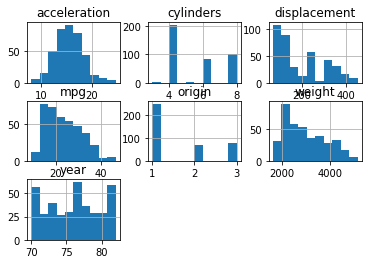

In [8]:
# Everything seems good, now chceking the ditribution of data by plotting the hist

data.hist()

####  Checking the shape, size, correlation, description and the info of the dataset
This step is only carried out to understand the dataset. Commonly used method for understanding the dataset is to find out the shape,discription, info,correlation of the data set, it is done so that we know how many rows, columns, correlation, min, maximum values are there.

In [9]:
data.describe() #it will tell us whats the mean, standard deviation and the maximum values along with the total counts

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
data.info() # .info will tell us what type of data we have i.e whether it is numerical, cateogrical, float etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


It is important to check the correlation between dependent and independent variables because that tells us about the strength of the relationship between dependent variables and independent variables.

In [11]:
data.corr() #.corr will give us a correlation amoung the variables

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


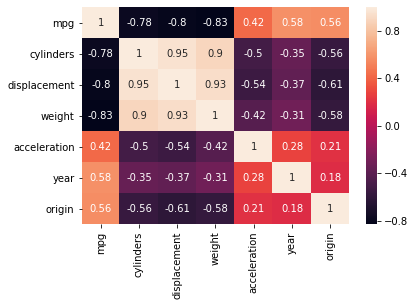

In [15]:
# checking correlation with heatmap
correlation=data.corr() # putting the correlation data into a variable called correlation
sns.heatmap(correlation,annot=True) #annot=True is to add values to the graph

####  Splitting the dataset to X and Y variable

In [17]:
# Assigning X and Y values

X=data[['cylinders','weight']] # if we need to put two square brackets bcz there are more than one more variable, just one square bracket
#throws key error
y=data['mpg']

print(X.head())
print(y.head())

# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

   cylinders  weight
0          8    3504
1          8    3693
2          8    3436
3          8    3433
4          8    3449
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


It is immportant to split the dataset into training and testing so that model can learn from training dataset and perform on testing dataset. The test size for the dataset varies from industry to industry. However, a standard of 70-30 is taken in general, where 70 % of the data set is used for training and 30 % of the data is used for testing

In [18]:
# splitting dataset into train/test split

from sklearn.model_selection import train_test_split # from model_selection importing train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30) # Test size is only 30 % of the entire dataset

####  Building a K Fold CV model
Here where we will evaluate scores based on different sets of data from the training set.

In [19]:
from sklearn.model_selection import KFold # importing KFOld from sklearns model selection
kf=KFold(n_splits=5, shuffle=True)
# shuffle= true bcz it will create our kfold sets randomly so that we don't introduce some bias into the data by taking the data points

In [20]:
# Initiating the model with Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression() # Storing LinearRegression into a variable lr so that it makes it easier to write the code

In [22]:
#now we evaluate our model using the number of k-folds. Note that the 'cv' term is equal to our kf module we set above
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lr,X_train,y_train,cv=kf)
cv_scores

array([0.79431512, 0.6548255 , 0.61083435, 0.65554979, 0.7258181 ])

'''
Now we can see our 5 scores above.  Each k-fold times we run the model, we produce the score, discard that model, run a new model
and rescore.  We repeat that for, in the above case, 5 times.  
Below we will try splitting the data 10 times and running 10 models:
'''

In [23]:
kf=KFold(n_splits=10) # not importing KFold from sklearn bcz it was already imported once
cv_scores=cross_val_score(lr,X_train,y_train,cv=kf)
cv_scores

array([0.62434612, 0.62769972, 0.69926641, 0.63594526, 0.64298821,
       0.74208934, 0.6729748 , 0.69012784, 0.74017628, 0.72090625])

In [24]:
# we can now average all the scores from all 10 cross validations and get an average score for our model:
cv_scores.mean()

0.6796520231001713

In [25]:
#Getting all the scores from all the folds
cv_scores=cross_val_score(lr,X_test,y_test,cv=kf)
cv_scores 

array([0.85359942, 0.48819034, 0.70088748, 0.75916809, 0.77019055,
       0.56772611, 0.61263905, 0.38630591, 0.71057566, 0.59387266])

In [26]:
cv_scores.mean() # getting an average of all the scores

0.6443155272874936

#### Conclusion:
K Fold CV is a very powerful and accurate technique because it let's you know what is your exact accuracy, as it takes the average of the folds/accuracies. 